Step - 1 Data Preparation

In [ ]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline


In [ ]:
# reading the dataset
raw_df = pd.read_csv('framingham.csv')
raw_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


Step - 2 Analysis & Visualization of Data

In [ ]:
# Information on the the data frame
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
# first 05 records of the dataset
raw_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# checking whether if there are null values in the dataset
raw_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
# get descriptive statistical data
raw_df.describe(include='all')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# names of the columns in the dataset
raw_df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Check the correlation of each column
fig = px.imshow(raw_df.corr().sort_values(by='TenYearCHD'), text_auto=True, title='Heatmap of Correlation')
fig.show()

In [ ]:
# Distribution of age in the dataset
px.histogram(raw_df, x='age', color='male', title='Histogram of Age column')

In [ ]:
# Distribution of education in the dataset
raw_df['education'].value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

In [ ]:
import plotly.graph_objects as go
labels = raw_df['education']
values = raw_df['education'].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Education</b>")
fig.show()

In [ ]:
px.histogram(raw_df, 'currentSmoker', color='currentSmoker', nbins=4)

In [ ]:
# Data visualization Heart Disease by systolic blood pressure
plt.figure(figsize=(15,10))
sns.countplot(x="prevalentHyp", hue="TenYearCHD", data=raw_df,palette="Set1")
plt.title("Heart Disease by Prevalent Hypertension blood pressure")

Step - 3 Imputing Missing Values

In [ ]:
# check the size of Missing values
raw_df.isnull().sum()

In [ ]:
# make a list out of all the numeric cols
numeric_cols = raw_df.select_dtypes(include=np.number).columns.tolist()

In [ ]:
numeric_cols

In [ ]:
# Using simpleImputer function to fill the NaN values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')

In [ ]:
imputer.fit(raw_df[numeric_cols])

In [ ]:
# get the best mean for each numeric column
list(imputer.statistics_)

In [ ]:
# transform all the null values to mean values
raw_df[numeric_cols] = imputer.transform(raw_df[numeric_cols])

In [ ]:
# check for null values
raw_df.isnull().sum()

Step 4 - Scaling Features

In [ ]:
# Use sklearn's MinMaxScaler to scale values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Scale data values so that all values are in a same range
scaler.fit(raw_df[numeric_cols])
raw_df[numeric_cols] = scaler.transform(raw_df[numeric_cols])
raw_df.describe()

Step-5 Splitting the Dataset

In [ ]:
# Split the dataset into training, validating and testing sets
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

Step - 6 Training and Evaluting the Model

In [ ]:
# Load LogisticRegression with liblinear solver
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [ ]:
# separate input columns and target column
valid_col = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
target_col = 'TenYearCHD'

In [ ]:
# Train the model
model.fit(train_df[valid_col], train_df[target_col])

LogisticRegression(solver='liblinear')

In [ ]:
# Display coefficients of the trained linear model
print(model.coef_.tolist())

[[0.345872282510524, 2.07869947410466, -0.044310652579349, -0.07006324433061073, 1.566751237516833, 0.6368011896207589, 0.7795400046526981, 0.32970836035294954, 0.6369411297679218, 0.578565017879698, 1.8705430830628205, 0.2283938207020694, -0.3262201185129823, -0.3385225839969218, 1.313208234367347]]


In [ ]:
# Display intercept of the trained linear model
print(model.intercept_)

[-3.89099158]


In [ ]:
#Evaluating the trained model and Predict using the linear model
X_train = train_df[valid_col]
X_val = val_df[valid_col]
X_test = test_df[valid_col]

train_preds = model.predict(X_train)
train_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
#Display target column of the training dataset
train_df[target_col]

1489    0.0
1368    0.0
2761    0.0
741     0.0
2418    0.0
       ... 
1962    0.0
2643    0.0
2689    0.0
212     0.0
3369    1.0
Name: TenYearCHD, Length: 2542, dtype: float64

In [ ]:
#gives the probabilities for the target in array form
train_probability = model.predict_proba(X_train)
train_probability

array([[0.90947884, 0.09052116],
       [0.83834028, 0.16165972],
       [0.95049625, 0.04950375],
       ...,
       [0.94716474, 0.05283526],
       [0.64386573, 0.35613427],
       [0.60685307, 0.39314693]])

In [ ]:
#list of class labels known to the classifier
model.classes_ 

array([0., 1.])

In [ ]:
#accuracy of the trained model
from sklearn.metrics import accuracy_score
accuracy_score(train_df[target_col], train_preds)


0.8544453186467349

In [ ]:
#analyse trained model using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(train_df[target_col], train_preds, normalize='true')

array([[0.997208  , 0.002792  ],
       [0.92620865, 0.07379135]])

Accuracy: 85.44%


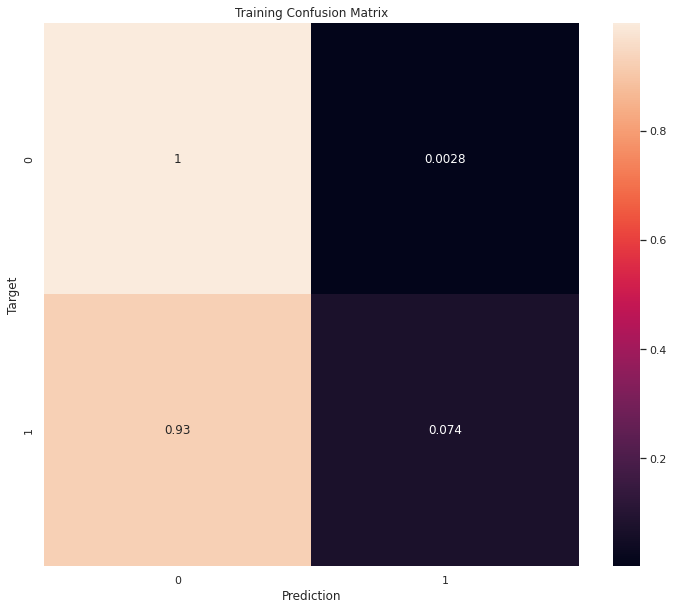

In [ ]:
#plot matrix
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure(figsize=(12, 10))
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

predict_and_plot(X_train, train_df[target_col], 'Training');

Accuracy: 84.55%


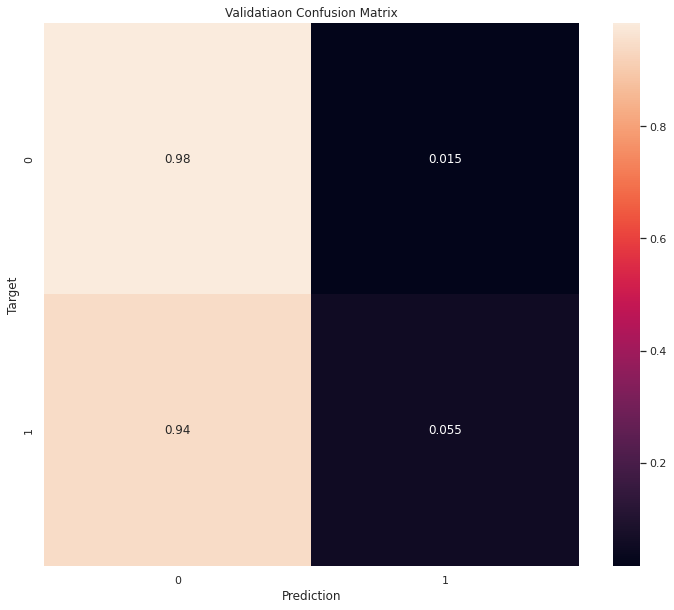

In [ ]:
#plot matrix for the validation dataset
predict_and_plot(X_val, val_df[target_col], 'Validatiaon');

Accuracy: 85.61%


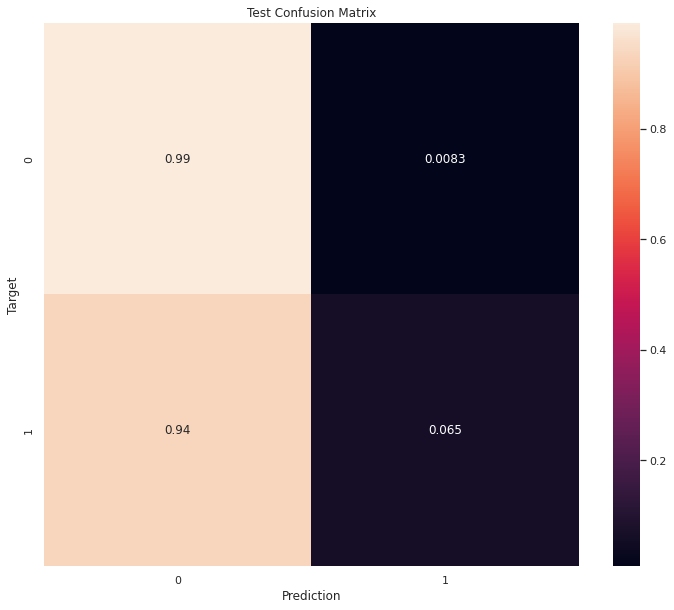

In [ ]:
##plot matrix for the testing dataset
predict_and_plot(X_test, test_df[target_col], 'Test');